In [18]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import plotly.express as px

from plotly.subplots import make_subplots

In [3]:
# read iclr2017
df = pd.read_json('datasets/iclr_2017.json')


In [4]:
scores = df['recommendation']
scores = [ np.mean(score) for score in scores]

df['scores'] = scores
# drop rows with scores less than 4
df = df[df['scores'] >=4]


In [5]:
# accepted paper
accepted = df[df['accepted'] == True]
# rejected paper
rejected = df[df['accepted'] == False]

In [23]:
rejected.scores

139    5.333333
140    5.666667
141    5.333333
142    6.333333
143    4.333333
         ...   
419    5.333333
421    4.666667
424    4.000000
425    4.666667
426    5.000000
Name: scores, Length: 215, dtype: float64

In [6]:
print(len(accepted), len(rejected))


172 215


In [7]:
# drop the outlier citation papers with  IQR METHOD
Q1_a = accepted['citation'].quantile(0.25)
Q3_a = accepted['citation'].quantile(0.75)
IQR_a = Q3_a - Q1_a
accepted_norm = accepted.query('(@Q1_a - 1.5 * @IQR_a) <= citation <= (@Q3_a + 1.5 * @IQR_a)')


# do the same for rejected papers
Q1_r = rejected['citation'].quantile(0.25)
Q3_r = rejected['citation'].quantile(0.75)
IQR_r = Q3_r - Q1_r
rejected_norm = rejected.query('(@Q1_r - 1.5 * @IQR_r) <= citation <= (@Q3_r + 1.5 * @IQR_r)')

In [32]:
print(len(accepted_norm), len(rejected_norm))

152 184


## Some plots

In [33]:
accept_no = len(df[df.accepted == True])
reject_no = len(df[df.accepted == False])

print('Accepted papers: ', accept_no)
print('Rejected papers: ', reject_no)

Accepted papers:  172
Rejected papers:  215


In [34]:
# sum citations of accepted papers dropping the Nan citations and normalize with the number of accepted papers

len_cited_accept = len(df[df.accepted == True].citation)
len_cited_reject = len(df[df.accepted == False].citation)
per_cited_accept = sum(df[df.accepted == True].citation)/len_cited_accept
per_cited_reject = sum(df[df.accepted == False].citation)/len_cited_reject

print('Per paper citations of accepted papers: ',per_cited_accept)
print('Per paper  citations of rejected papers: ',per_cited_reject)


Per paper citations of accepted papers:  446.6046511627907
Per paper  citations of rejected papers:  166.26511627906976


In [35]:
# calculate the average number of citations per paper for accepted and rejected papers for 95 quantile
len_cited_accept = len(accepted_norm)
len_cited_reject = len(rejected_norm)
normalized_cited_accept = sum(accepted_norm.citation)/len_cited_accept
normalized_cited_reject = sum(rejected_norm.citation)/len_cited_reject

print('Normalized per paper citations of accepted papers: ',normalized_cited_accept)
print('Normalized per paper citations of rejected papers: ',normalized_cited_reject)

Normalized per paper citations of accepted papers:  221.27631578947367
Normalized per paper citations of rejected papers:  34.65760869565217


In [73]:
fig = make_subplots(rows=1, cols=2)

# do not show tick
fig.update_xaxes(showticklabels=False)
trace1 = go.Violin(y=accepted_norm.scores,name = 'Accepted' ,box_visible=True, meanline_visible=True, points= 'all', marker=dict(color='#84c5fe'))
trace2 = go.Violin(y=rejected_norm.scores,name= 'Rejected' ,box_visible=True, meanline_visible=True,  points= 'all',marker=dict(color='#b94e4e'))


trace5 = go.Violin(y=accepted_norm.citation, box_visible=True, meanline_visible=True, points= 'all', marker=dict(color='#84c5fe'),showlegend= False,)
trace6 = go.Violin(y=rejected_norm.citation, box_visible=True, meanline_visible=True,  points= 'all',marker=dict(color='#b94e4e'),showlegend= False)

fig.add_trace(trace5, row=1, col=1)
fig.add_trace(trace6, row=1, col=1)
fig.add_trace(trace1, row=1, col=2)
fig.add_trace(trace2, row=1, col=2)

#give title to col 1 by using x axis

fig.update_xaxes(title_text="Citations", row=1, col=1)

fig.update_xaxes(title_text="Scores", row=1, col=2)


#increase numbers in y axis for violin plot

fig['layout']['yaxis'].update(range=[-150, 1400])

fig['layout']['yaxis2'].update(range=[3, 9])
# make plot taller
fig['layout'].update(height=500, width=1000)

# make background gray
fig['layout'].update(plot_bgcolor='rgb(230, 230,230)')


#export pdf using pio
import plotly.io as pio
pio.write_image(fig, 'figures/violin.pdf', format='pdf', width=1000, height=500)

fig.show()

In [63]:
# Data for the violin plot
data = [1, 2, 2, 3, 3, 4, 4, 5, 5]

# Create a violin plot
violin = go.Violin(y=data, box_visible=True)

# Calculate the mean of the data
mean_y = sum(data) / len(data)

# Create a line trace for the mean
mean_trace = go.Scatter(y=[mean_y], mode='lines', line=dict(color='red', width=2))

# Create a layout for the plot
layout = go.Layout(title='Violin Plot with Mean Line', xaxis=dict(title='X'), yaxis=dict(title='Y'))

# Create the plot
fig = go.Figure(data=[violin, mean_trace], layout=layout)

# Show the plot
fig.show()


# Score vs Citation

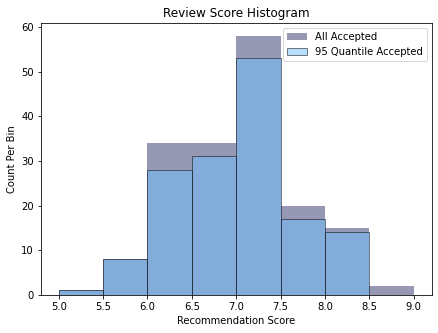

In [12]:


bins = np.arange(5, 9.5, 0.5)

plt.figure(figsize=(7, 5))
plt.xlabel('Recommendation Score')
plt.ylabel('Count Per Bin')
plt.title('Review Score Histogram')

plt.hist(accepted['scores'], bins=bins, color='#313369', label='All Accepted' ,alpha = 0.5)

plt.hist(accepted_norm['scores'], bins=bins, alpha = 0.5, color='#6ec1ff', label='95 Quantile Accepted', edgecolor='black')
plt.savefig('figures/accepted_score_hist.pdf')
plt.legend()


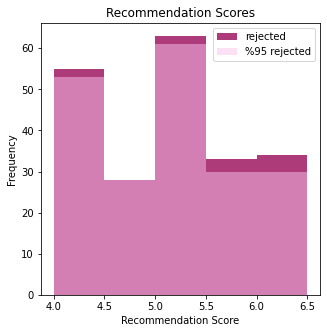

In [64]:
bins = np.arange(4, 7, 0.5)

plt.figure(figsize=(5, 5))
plt.xlabel('Recommendation Score')
plt.ylabel('Frequency')
plt.title('Recommendation Scores')
plt.hist(rejected['scores'], bins=bins, label='rejected', color='#ad3a79')
plt.hist(rejected_norm['scores'], bins=bins, label='%95 rejected', color='#fbc4ed', alpha=0.5)
plt.legend()

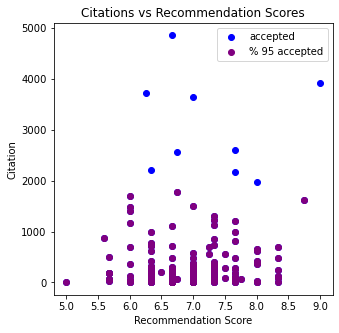

In [35]:
# plot citations against recommendation scores
plt.figure(figsize=(5, 5))
plt.ylabel('Citation')
plt.xlabel('Recommendation Score')
plt.title('Citations vs Recommendation Scores')
plt.scatter(accepted['scores'], accepted['citation'],  label='accepted', color='b')
plt.scatter(accepted_norm['scores'], accepted_norm['citation'],  label='% 95 accepted', color='purple')
plt.legend()

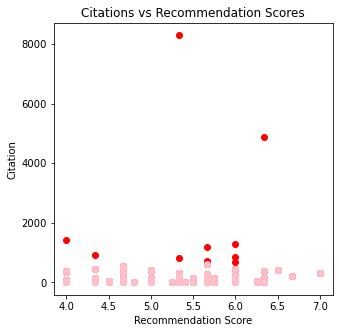

In [36]:
# plot the same thing for rejected papers
plt.figure(figsize=(5, 5))
plt.ylabel('Citation')
plt.xlabel('Recommendation Score')
plt.title('Citations vs Recommendation Scores')
plt.scatter(rejected['scores'], rejected['citation'],  label='rejected', color='r')
plt.scatter(rejected_norm['scores'], rejected_norm['citation'],  label='% 95 rejected', color='pink')

In [65]:

accepted['scores'] = accepted['scores'].astype(int)

# and calculate the average number of citations for each group
accepted_grouped = accepted.groupby('scores').mean()
# show paper number for each group

accepted_grouped['paper_no'] = accepted.groupby('scores').count()['citation']
accepted_grouped

<ipython-input-65-e07741eb5a24>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accepted['scores'] = accepted['scores'].astype(int)


,id,accepted,citation,paper_no
scores,,,,
5,386.111111,True,236.555556,9
6,411.691176,True,484.000000,68
7,404.474359,True,385.910256,78
8,373.812500,True,484.687500,16
9,312.000000,True,3919.000000,1


In [42]:
# do the same thing for accepted_norm
accepted_norm['scores'] = accepted_norm['scores'].astype(int)
accepted_norm_grouped = accepted_norm.groupby('scores').mean()
accepted_norm_grouped['paper_no'] = accepted_norm.groupby('scores').count()['citation']
accepted_norm_grouped

<ipython-input-42-2897e13eaace>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accepted_norm['scores'] = accepted_norm['scores'].astype(int)


,id,accepted,citation,paper_no
scores,,,,
5,386.111111,True,236.555556,9
6,411.921875,True,306.015625,64
7,405.000000,True,289.173333,75
8,377.733333,True,384.866667,15


In [47]:
# do the same thing for accepted_outlier

accepted_outlier['scores'] = accepted_outlier['scores'].astype(int)
accepted_outlier_grouped = accepted_outlier.groupby('scores').mean()
accepted_outlier_grouped['paper_no'] = accepted_outlier.groupby('scores').count()['citation']
accepted_outlier_grouped

<ipython-input-47-d3347b1feb21>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accepted_outlier['scores'] = accepted_outlier['scores'].astype(int)


,id,accepted,citation,paper_no
scores,,,,
6,408.000000,True,3331.750000,4
7,391.333333,True,2804.333333,3
8,315.000000,True,1982.000000,1
9,312.000000,True,3919.000000,1


In [52]:
# do the same thing for rejected_outlier

rejected_outlier['scores'] = rejected_outlier['scores'].astype(int)
rejected_outlier_grouped = rejected_outlier.groupby('scores').mean()
rejected_outlier_grouped['paper_no'] = rejected_outlier.groupby('scores').count()['citation']
rejected_outlier_grouped

<ipython-input-52-6524fe7e2926>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rejected_outlier['scores'] = rejected_outlier['scores'].astype(int)


,id,accepted,citation,paper_no
scores,,,,
4,703.0,False,1169.00,2
5,682.8,False,2334.60,5
6,650.0,False,1923.25,4
